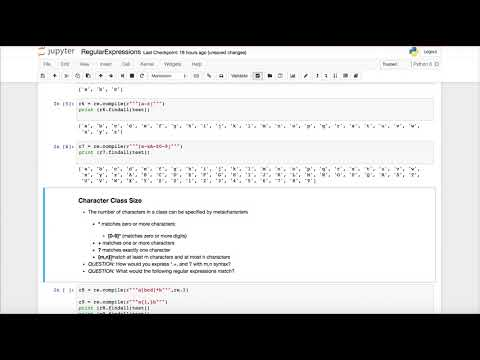

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo("jomReZxewo0", height=600, width=800)

# Regular Expressions

## Motivation
* Regular expressions are an integral part of many biomedical informatics research projects that involve information extraction.
* Essentially regular expressions are compact pieces of code that allow you to match, extract, or substitute complex textual patterns. 
* Some applications include:
    * Decision support: extracting pertinent medical information from text archive (Is patient’s digoxin drug level > 3?)
    * Public Health: extracting names, locations, dates of death from obituaries
    * NLP: Negation of findings and diseases in reports if a phrase is within six characters of a negation term

## Are Regular Expressions Fun?
* Maybe...But
>If you've heard about regular expressions before, you probably know how powerful they are; if you haven't, prepare to be amazed.
>	
>You should note, however, that mastering regular expressions may be a bit tricky at first. **Okay, very tricky actually.** (*Beginning Python: From Novice to Professional*)

## Before We Get Started

### Always build regular expressions from raw strings
#### What is a raw string?
    
```Python
"This is not a raw string"

r"This is a raw string"
```
### Why?
#### raw strings don't evaluate special characters in the string.
* This will be important because regular expressions will be built using many special characters.
        

# Getting Started, Real Slowly
### A very simple regular expression can be created to search for a fixed string (e.g. "Brian")

## Steps
1. ``import re``
1. **compile** the regular expression
1. Use the resulting regular expression object (``r1``), find all matches in some string (``nameString``)

In [ ]:
import re
nameString = \
 """Wendy, Brian, Karen, Charlene, Jeff. 
     wendy, brian, Karen, charlene, jeff"""
r1 = re.compile(r"""Brian""")
print (r1.findall(nameString))


#### Here we used the [`findall`](https://docs.python.org/3/library/re.html#re.regex.findall) method to return a list of all the matches.

#### If I want, I can make the regular expression case insensitive with a *COMPILATION FLAG.*

In [ ]:
r1 = re.compile(r"""Brian""")
print (r1.findall(nameString))
r2 = re.compile(r"""Brian""", re.IGNORECASE)
print (r2.findall(nameString))
r3 = re.compile(r"""Brian""",re.I) # alias for IGNORECASE
print (r3.findall(nameString))


## The Real Power of Regular Expressions...
### Comes from metacharacters
### Here is a list of all the metacharacters
    . ^ $ * + ? { [ ] \ | ( )     

### Metacharacters: []
* Square brackets are used to specify a "**character class,** which is a set of characters that you wish to match."

```Python
    [abc]
    [a-c]
    [a-z]
    [a-zA-Z]
    [a-zA-Z0-9]  
```

In [ ]:
test = """abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMN
                       OPQRSTUVWXYZ0123456789"""

r4 = re.compile(r"""[abc]""")

print (r4.findall(test))

In [ ]:
r5 = re.compile(r"""[a-c]""")
print (r5.findall(test))

In [ ]:
r6 = re.compile(r"""[a-z]""")
print (r6.findall(test))


In [ ]:
r7 = re.compile(r"""[a-zA-Z0-9]""")
print (r7.findall(test))


### Character Class Size
* The number of characters in a class can be specified by metacharacters
    * ** * ** matches zero or more characters: 
        * **[0-9]* ** (matches zero or more digits)
    * **+** matches one or more characters
    * **?** matches exactly one character
    * **{m,n}**  match at least m characters and at most n characters

* *QUESTION:* How would you express *,+, and ? with m,n syntax?
* *QUESTION:* What would the following regular expressions match?

In [ ]:
r8 = re.compile(r"""a[bcd]*b""",re.I)

r9 = re.compile(r"""a{1,}b""")
print (r8.findall(test))
print (r9.findall(test))

In [ ]:
print(r9.findall("""aabaaabab"""))

### Greedy vs. Non-Greedy Capture
* As defined above, the matching is all **greedy**, that is the regular expressions will match the **maximum** number of characters as possible
* We can define a **non-greedy** match that will match the **minimum** number of characters as possible
#### Greedy Version
```Python
[0-9]{3,5}
```
#### Non-greedy Version
```Python
[0-9]{3,5}?
```

In [ ]:
rg = re.compile(r"""a{3,5}""")
rng = re.compile(r"""a{3,5}?""")

**Greedy capture**: grabs five

In [ ]:
print(rg.findall("aaaaaa"))

**Non-greedy capture:** grabs three

In [ ]:
print(rng.findall("aaaaaa"))

### Metacharacters in Character Classes
* Within *character classes*, metacharacters do not have special meaning. 
* That is, they are treated just like any other character to be matched.
    * One exception: `^` as the first character in the class denotes the compliment. 
    * That is, match all characters except those denoted in the class.

In [ ]:
r10 = re.compile(r"""[^A-Z]""")
print (r10.findall(test))

### Metacharacters (\\)

* The backslash character is used to escape all the metacharacters, so to search for an asterisk (``*``) you would type **``\*``**. 
* Try the regular expression with out the backslash

In [ ]:
r11 = re.compile(r"*")
print (r11.findall("""The range of the function f1* is [0,12] 
                  and the domain of f1* is [0,144]"""))

* **\d **: Matches any decimal digit; 
    * this is equivalent to the class **[0-9].** 
    

In [ ]:
r12 = re.compile(r"\d+")
print (r12.findall("My work address is 729 Arapeen Drive, Salt Lake City, UT, 84108."))


* **\D **: Matches any non-digit character; 
    * this is equivalent to the class **[^0-9].** 
    

In [ ]:
r13 = re.compile(r"\D+") # try \D and \D+
print (r13.findall("My work address is 729 Arapeen Drive, Salt Lake City, UT, 84108.")
)

* **\s **: Matches any whitespace character; 
    * this is equivalent to the **[ \t\n\r\f\v].** 
    

In [ ]:
r14 = re.compile(r"\s")
result14= r14.findall("My work address is 729 Arapeen Drive, Salt Lake City, UT, 84108.")
print (result14)
r15 = re.compile(r"[ \t\n\r\f\v]")
result15 = r15.findall("My work address is 729 Arapeen Drive, Salt Lake City, UT, 84108.")
print (result15)
print( result14 == result15)

* **\S **: Matches any non-whitespace character; 
    * this is equivalent to the class **[^ \t\n\r\f\v].** 
    

In [ ]:
r16 = re.compile(r"\S+")
r17 = re.compile(r"[^ \t\n\r\f\v]+")
result16 = r16.findall("My work address is 729 Arapeen Drive, Salt Lake City, UT, 84108.")
result17 = r17.findall("My work address is 729 Arapeen Drive, Salt Lake City, UT, 84108.")
print (result16)
print (result17)
print (result16 == result17)

* **\w**: Matches any alphanumeric character; 
    * this is equivalent to the class **[a-zA-Z0-9_].** 
    

In [ ]:
r18 = re.compile(r"\w+")
r19 = re.compile(r"[a-zA-Z0-9_]+")
result18 = r18.findall("My work address is 729 Arapeen Drive, Salt Lake City, UT, 84108.")
result19 = r19.findall("My work address is 729 Arapeen Drive, Salt Lake City, UT, 84108.")
print (result18)
print (result19)
print (result18 == result19)

* **\W **: Matches any non-alphanumeric character; 
    * this is equivalent to the class **[^a-zA-Z0-9_].**

In [ ]:
r18 = re.compile(r"\W")
r19 = re.compile(r"[^a-zA-Z0-9_]")
result18 = r18.findall("My work address is 729 Arapeen Drive, Salt Lake City, UT, 84108.")
result19 = r19.findall("My work address is 729 Arapeen Drive, Salt Lake City, UT, 84108.")
print (result18)
print (result19)
print (result18 == result19)
print (',' in result18)

* **`|`** (vertical bar): This is an OR (match this OR match that)

In [ ]:
r20 = re.compile(r"""Wakara|Arapeen""")
print(r20.findall("""My work addresses are 729 Arapeen Drive, Salt Lake City, UT, 84108 and 421 Wakara Way, Salt Lake City, *4108."""))

## Putting Things Together
### How could we use regular expressions to recognize zip codes?

In [ ]:
address = "My work address is 729 Arapeen Drive, Salt Lake City, UT, 84108."

findZipcode = re.compile(r"""\d{5,5}""")
findZipcode2 = re.compile(r"""[0-9]{5,5}""")
print (findZipcode.findall(address))
print (findZipcode2.findall(address))

### How about finding telephones?

In [ ]:
txt = open("../Resources/contact.html","r").read()
findPhone = re.compile(r"""[0-9]{3,3}-\d{4,4}|[0-9]{3,3}-[0-9]{3,3}-\d{4,4}""")
print (findPhone.findall(txt))

### How about finding names?
#### Let's look at two formats
* Brian Chapman
* Chapman, Brian

In [ ]:
findName1 = re.compile(r"""[A-Z][a-z]+\s+[A-Z][a-z]+""")
#print findName1.findall("Brian Chapman, Wendy Chapman, Jeremiah Chapman")
names1 = findName1.findall(txt)
print (names1[:80])

In [ ]:
findName2 = re.compile(r"""[A-Z][a-z]*,\s+[A-Z][a-z]*""")
names2 = findName2.findall(txt)
print (names2[:20])

In [ ]:
testString = """Brian has a nephew named Ben. Br. Chapman died yesterday. Brian Chapman Brian E. Chapman Brian Earl Chapman Wendy Webber Chapman Clare 1234 4321.1234
python python.org http://python.org www.python.org jython zython Brad Bob cpython brian http://www.python.org perl Perl PERL"""

### Exercises

Here are some problems to try writing regular expression. You can find my solutions in classprep.py.
1. Find all alphanumeric strings that end in "ython"
2. Find all instances of "Brian", ignoring case
3. Find all jython or python instances
4. Find all names that start with B
5. Use a non-greedy regular expression to find all the non-overlapping kmers ($3\le k \le 5$) in the sequence with id `exercise5` in "sequence.fasta" that begin and end with 'C'.

In [ ]:
rEx1 = None
print (rEx1.findall(testString))

In [ ]:
rEx2 = None
print (rEx2.findall(testString))

In [ ]:
rEx3 = None
print (rEx3.findall(testString))

In [ ]:
rEx4 = None 
print (rEx4.findall(testString))

In [ ]:
def read_fasta(fname):
    seqs = {}
    with open("sequence.fasta") as f0:
        for line in f0:
            if line[0] == ">":
                try:
                    seqs[key] = seq
                except NameError:
                    pass
                key = line[1:].strip()
                seq = ""
            elif line[0] in set("ACTG"):
                seq += line.strip()
        seqs[key] = seq
    return seqs
seq = read_fasta("sequence.fasta")["exercise5"]
rEx5 = None
rEx5.findall(seq)